### LC数据初步分析

首先我们来分析一下LC.csv数据集，LC (Loan Characteristics) 表为标的特征表，每支标一条记录。共有21个字段，包括一个主键（listingid）、7个标的特征和13个成交当时的借款人信息，全部为成交当时可以获得的信息。信息的维度比较广，大致可以分为基本信息，认证信息，信用信息，借款信息。

基本信息：年龄、性别；

认证信息：手机认证、户口认证、视频认证、征信认证、淘宝认证；

信用信息：初始评级、历史正常还款期数、历史逾期还款期数；

借款信息：历史成功借款金额、历史成功借款次数、借款金额、借款期限、借款成功日期

对于LC数据集我们提出以下四个问题：

1.用户画像，包含使用平台贷款业务的用户的性别比例，学历水平，是否为旧有用户，年龄分布等信息。

2.资金储备，每日借款金额大概多少？波动有多大？从而公司每日需准备多少资金可以保证不会出现资金短缺？

3.用户逾期率，借款人的初始评级、借款类型、性别、年龄等特征对于逾期还款的概率有无显著影响？哪些群体逾期还款率明显较高？

4.借款利率，哪些群体更愿意接受较高的借款利率？

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


LC = pd.read_csv('ppdai2017/LC.csv')
LP = pd.read_csv('ppdai2017/LP.csv')

对数据进行清洗

依次检查重复值、缺失值的处理，一致化以及异常值，数据集很干净。

In [3]:
LC.info()
LC.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328553 entries, 0 to 328552
Data columns (total 21 columns):
ListingId    328553 non-null int64
借款金额         328553 non-null int64
借款期限         328553 non-null int64
借款利率         328553 non-null float64
借款成功日期       328553 non-null object
初始评级         328553 non-null object
借款类型         328553 non-null object
是否首标         328553 non-null object
年龄           328553 non-null int64
性别           328553 non-null object
手机认证         328553 non-null object
户口认证         328553 non-null object
视频认证         328553 non-null object
学历认证         328553 non-null object
征信认证         328553 non-null object
淘宝认证         328553 non-null object
历史成功借款次数     328553 non-null int64
历史成功借款金额     328553 non-null float64
总待还本金        328553 non-null float64
历史正常还款期数     328553 non-null int64
历史逾期还款期数     328553 non-null int64
dtypes: float64(3), int64(7), object(11)
memory usage: 52.6+ MB


,ListingId,借款金额,借款期限,借款利率,年龄,历史成功借款次数,历史成功借款金额,总待还本金,历史正常还款期数,历史逾期还款期数
count,3.285530e+05,328553.000000,328553.000000,328553.000000,328553.000000,328553.000000,3.285530e+05,3.285530e+05,328553.000000,328553.000000
mean,1.907948e+07,4423.816906,10.213594,20.601439,29.143042,2.323159,8.785857e+03,3.721665e+03,9.947658,0.423250
std,8.375769e+06,11219.664024,2.780444,1.772408,6.624286,2.922361,3.502736e+04,8.626061e+03,14.839899,1.595681
min,1.265410e+05,100.000000,1.000000,6.500000,17.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.190887e+07,2033.000000,6.000000,20.000000,24.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,1.952325e+07,3397.000000,12.000000,20.000000,28.000000,2.000000,5.000000e+03,2.542410e+03,5.000000,0.000000
75%,2.629862e+07,5230.000000,12.000000,22.000000,33.000000,3.000000,1.035500e+04,5.446810e+03,13.000000,0.000000
max,3.281953e+07,500000.000000,24.000000,24.000000,56.000000,649.000000,7.405926e+06,1.172653e+06,2507.000000,60.000000


In [4]:
#观察一下年龄分布，最小17岁，最大56岁，平均年龄29岁，33岁以下的占比超过了75%。说明用户整体还是中青年。
#将年龄分为'15-20', '20-25', '25-30', '30-35', '35-40', '40+'比较合理
#观察一下借款金额分布，最小借款金额为100元，最大为50万元，平均值为4424元，低于5230的借款金额占到了75%。
#说明应该是小额借款比较多。将借款金额分为0-2000，2000-3000，3000-4000，4000-5000，5000-6000，6000以上比较合理
LC['ListingId'].value_counts()


28482281    1
12030631    1
22402521    1
22594381    1
24992631    1
14209871    1
15737681    1
14599191    1
12596051    1
13632341    1
25125561    1
17075841    1
31486811    1
15449021    1
14173021    1
17196791    1
21517151    1
24873431    1
28943201    1
13693771    1
26313331    1
6349641     1
27482821    1
5497641     1
11256621    1
26379211    1
5493551     1
6501171     1
30213001    1
12780341    1
           ..
14597501    1
24538471    1
5680511     1
21992981    1
11099521    1
25775491    1
10059141    1
24535451    1
27356551    1
10894701    1
22590861    1
26964891    1
27774291    1
20409671    1
9426461     1
13049161    1
6753611     1
9387341     1
28758861    1
27409601    1
14377881    1
7241061     1
31461561    1
26733911    1
31091361    1
10468701    1
25144671    1
14045021    1
12471651    1
20799011    1
Name: ListingId, Length: 328553, dtype: int64

In [7]:
LP.info()
LP.describe()


# 数据很干净

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3203276 entries, 0 to 3203275
Data columns (total 10 columns):
ListingId     int64
期数            int64
还款状态          int64
应还本金          float64
应还利息          float64
剩余本金          float64
剩余利息          float64
到期日期          object
还款日期          object
recorddate    object
dtypes: float64(4), int64(3), object(3)
memory usage: 268.8+ MB


,ListingId,期数,还款状态,应还本金,应还利息,剩余本金,剩余利息
count,3.203276e+06,3.203276e+06,3.203276e+06,3.203276e+06,3.203276e+06,3.203276e+06,3.203276e+06
mean,1.947391e+07,5.904377e+00,6.037828e-01,4.604506e+02,4.232540e+01,1.846682e+02,1.472581e+01
std,8.312219e+06,3.455267e+00,6.684636e-01,2.041906e+03,8.346626e+01,4.012435e+02,2.999337e+01
min,1.265410e+05,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.222287e+07,3.000000e+00,0.000000e+00,1.881500e+02,1.301000e+01,0.000000e+00,0.000000e+00
50%,2.025666e+07,6.000000e+00,1.000000e+00,3.309400e+02,2.978000e+01,0.000000e+00,0.000000e+00
75%,2.661693e+07,9.000000e+00,1.000000e+00,5.123400e+02,5.539000e+01,2.991400e+02,1.968000e+01
max,3.281953e+07,2.400000e+01,4.000000e+00,5.000000e+05,1.875000e+04,1.000000e+05,3.978370e+03


In [11]:
LP = LP.dropna(how='any')
LP.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3203276 entries, 0 to 3203275
Data columns (total 10 columns):
ListingId     int64
期数            int64
还款状态          int64
应还本金          float64
应还利息          float64
剩余本金          float64
剩余利息          float64
到期日期          object
还款日期          object
recorddate    object
dtypes: float64(4), int64(3), object(3)
memory usage: 268.8+ MB


In [12]:
LP.info()
LC = LC.dropna(how='any')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3203276 entries, 0 to 3203275
Data columns (total 10 columns):
ListingId     int64
期数            int64
还款状态          int64
应还本金          float64
应还利息          float64
剩余本金          float64
剩余利息          float64
到期日期          object
还款日期          object
recorddate    object
dtypes: float64(4), int64(3), object(3)
memory usage: 268.8+ MB


#### 分析用户画像（性别、学历、年龄、是否首标）

按‘性别’、‘年龄’、‘是否首标’、‘学历认证’字段对‘借款金额’进行加总，用饼图或柱状图将结果可视化

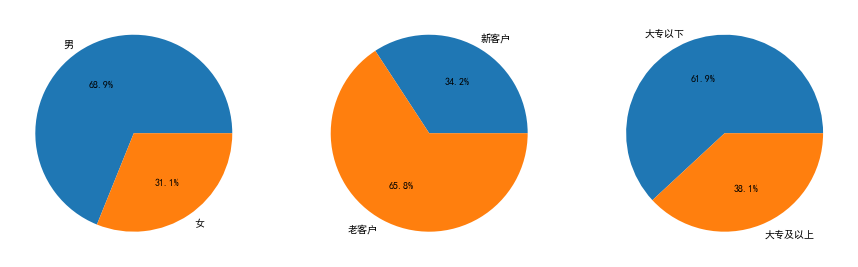

In [17]:
#性别分析
male = LC[LC['性别']=='男']
female = LC[LC['性别']=='女']
sex = (male,female)
sex_data = (male['借款金额'].sum(),female['借款金额'].sum())
sex_idx = ('男','女')
plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
plt.pie(sex_data,labels=sex_idx,autopct='%.1f%%')

#正常显示中文
plt.rcParams['font.sans-serif']=['SimHei']

#新老客户分析
new = LC[LC['是否首标'] == '是']
old = LC[LC['是否首标'] == '否']
newold_data = (new['借款金额'].sum(), old['借款金额'].sum())
newold_idx = ('新客户', '老客户')
plt.subplot(1,3,2)
plt.pie(newold_data, labels=newold_idx, autopct='%.1f%%')

#学历分析
ungraduate = LC[LC['学历认证'] == '未成功认证']
graduate = LC[LC['学历认证'] == '成功认证']
education_data = (ungraduate['借款金额'].sum(), graduate['借款金额'].sum())
education_idx = ('大专以下', '大专及以上')
plt.subplot(1,3,3)
plt.pie(education_data, labels=education_idx, autopct='%.1f%%')
plt.show()


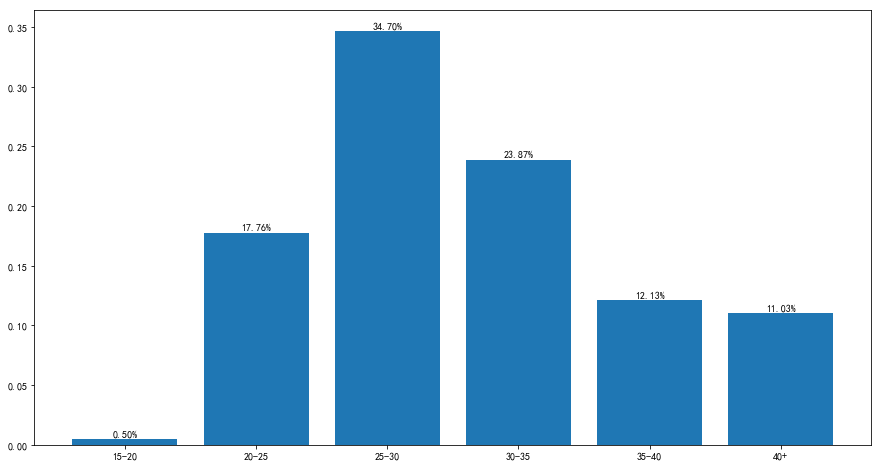

In [20]:
#年龄分析
ageA = LC.loc[(LC['年龄'] >= 15) & (LC['年龄'] < 20)]
ageB = LC.loc[(LC['年龄'] >= 20) & (LC['年龄'] < 25)]
ageC = LC.loc[(LC['年龄'] >= 25) & (LC['年龄'] < 30)]
ageD = LC.loc[(LC['年龄'] >= 30) & (LC['年龄'] < 35)]
ageE = LC.loc[(LC['年龄'] >= 35) & (LC['年龄'] < 40)]
ageF = LC.loc[LC['年龄'] >= 40]
age = (ageA, ageB, ageC, ageD, ageE, ageF)
age_total = 0
age_percent = []
for i in age:
    tmp = i['借款金额'].sum()
    age_percent.append(tmp)
    age_total += tmp
age_percent /= age_total
age_idx = ['15-20', '20-25', '25-30', '30-35', '35-40', '40+']
plt.figure(figsize=(15, 8))
plt.bar(age_idx, age_percent)
for (a,b) in zip(age_idx,age_percent):
    plt.text(a,b+0.001,'%.2f%%' % (b * 100), ha='center', va='bottom', fontsize=10)
plt.show()

结论：

1.男性客户的贡献的贷款金额占到了69%，可能的原因是男性更倾向于提前消费且贷款金额较大。

2.非首标的金额占比达到66%，说明用户倾向于多次使用，产品粘性较高。

3.大专以下学历的贷款金额更多，但是由于可能有很多用户并未认证学历，所以数据存在出入。

4.年龄段在25-30岁之间的借款金额最多，而20-35岁的人群占比超过75%，是该产品的主力消费人群。

#### 分析资金储备

每日的借款金额大概多少？波动有多大？公司每日需要准备多少资金可以保证不会出现资金短缺？

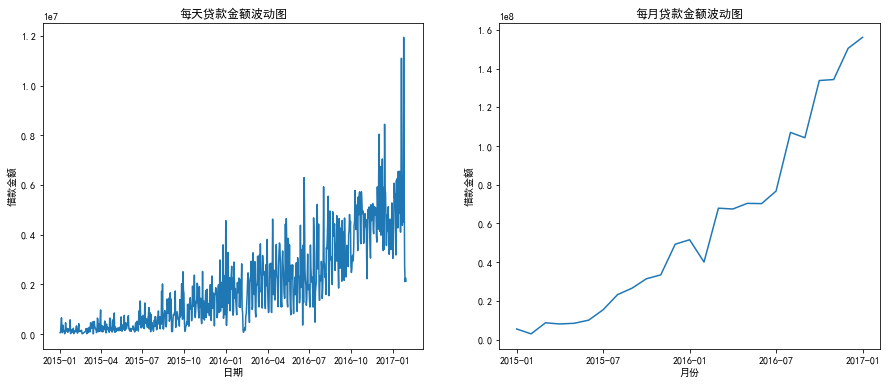

In [22]:
from datetime import datetime

#分析每日贷款金额的走势
loan = LC[['借款成功日期', '借款金额']].copy()
loan['借款日期'] = pd.to_datetime(loan['借款成功日期'])
loan1 = loan.pivot_table(index='借款日期', aggfunc='sum').copy()
plt.figure(figsize=(15, 6))
plt.subplot(1,2,1)
plt.plot(loan1)
plt.xlabel('日期')
plt.ylabel('借款金额')
plt.title('每天贷款金额波动图')

#分析每月贷款金额的走势
loan['借款成功月份'] = [datetime.strftime(x, '%Y-%m') for x in loan['借款日期']]
loan2 = loan.pivot_table(index='借款成功月份', aggfunc='sum').copy()
plt.subplot(1,2,2)
plt.plot(loan2)
plt.xlabel('月份')
plt.xticks(['2015-01','2015-07','2016-01','2016-07','2017-01'])
plt.ylabel('借款金额')
plt.title('每月贷款金额波动图')
plt.show()

In [23]:
# 对2017年1月的数据继续进行分析，并求出平均值和标准差
loan3 = loan1.loc['2017-01']
avg = loan3['借款金额'].mean()
std = loan3['借款金额'].std()
print(avg, std)

5204663.8 2203394.1435809094


结论：

1.每日贷款金额呈现的是一个往上的趋势,但是每天的波动较大。

2.每月贷款分析结论：从2015年1月到2017年1月，月度贷款金额呈现上升趋势，上升速度随着时间增快。

3.2017年1月每日的借款金额达到5204664元，标准差为2203394，根据3σ原则，想使每日借款金额充足的概率达到99.9%，则每日公式账上需准备5204664+2203394×3=11814846元。

3.分析逾期还款率（借款人的初始评级、借款类型、性别、年龄、借款金额等特征）

逾期还款率 = 历史逾期还款期数/（历史逾期还款期数+历史正常还款期数）

In [31]:
#初始评级的数据划分
level_idx = ('A','B','C','D','E','F')
lev = []
for i in level_idx:
    temp = LC[LC['初始评级'] == i]
    lev.append(temp)
lev

[        ListingId   借款金额  借款期限  借款利率      借款成功日期 初始评级   借款类型 是否首标  年龄 性别  \
 5          162641  20000    12  14.0  2015-03-25    A     普通    否  36  男   
 110       1592201   5000     6  14.0  2015-01-04    A     普通    否  32  女   
 154       1612081   5000     3  14.0  2015-01-06    A     普通    否  38  男   
 157       1613631  10300     6  16.0  2015-01-14    A     普通    否  33  男   
 202       1633181   3600    12  14.0  2015-01-08    A     普通    否  28  男   
 209       1636111  28000    12  20.0  2015-01-08    A     其他    否  35  男   
 223       1643271   9000     3  18.0  2015-01-10    A     普通    否  37  男   
 282       1669131  13000    12  15.0  2015-01-14    A     其他    否  32  男   
 319       1678701   5000     3  14.0  2015-01-19    A     普通    否  33  男   
 324       1679601   4600    12  20.5  2015-01-20    A     普通    否  26  男   
 363       1690211   5722     6  16.0  2015-01-18    A     普通    否  29  男   
 364       1690831  12125    12  16.0  2015-01-21    A     其他    否  38  女   

In [32]:
#借款类型的数据划分
kind_idx = ('电商', 'APP闪电','普通', '其他')
kind = []
for i in kind_idx:
    temp = LC[LC['借款类型'] == i]
    kind.append(temp)
kind

[        ListingId    借款金额  借款期限  借款利率      借款成功日期 初始评级 借款类型 是否首标  年龄 性别  \
 4          152141   20000     6  16.0  2015-01-22    C   电商    否  24  男   
 6          171191    3940     6  18.0  2015-06-26    E   电商    否  27  女   
 9          193831   10475     6  18.0  2015-04-15    C   电商    否  25  男   
 15        1080421    5250     6  18.0  2015-05-27    C   电商    否  25  男   
 43        1553501  400000     6  14.0  2015-01-03    B   电商    否  44  女   
 76        1578401  460000     6  14.0  2015-01-04    B   电商    否  38  男   
 81        1579591    4311    10  20.0  2015-01-04    C   电商    否  27  女   
 97        1585971   40000     6  16.0  2015-01-02    B   电商    是  43  男   
 114       1594791    5200     6  18.0  2015-01-05    C   电商    否  31  男   
 138       1606181  300000     6  15.0  2015-01-23    B   电商    是  28  男   
 140       1606911   54000     6  15.0  2015-01-05    B   电商    否  28  男   
 147       1607971   40000     6  16.0  2015-01-05    C   电商    是  47  男   
 183       1

In [33]:
#不同借款金额的数据划分  
amount_idx = ('0-2000', '2000-3000', '3000-4000', '4000-5000', '5000-6000', '6000+')
amountA = LC.loc[(LC['借款金额'] > 0) & (LC['借款金额'] < 2000)]
amountB = LC.loc[(LC['借款金额'] >= 2000) & (LC['借款金额'] < 3000)]
amountC = LC.loc[(LC['借款金额'] >= 3000) & (LC['借款金额'] < 4000)]
amountD = LC.loc[(LC['借款金额'] >= 4000) & (LC['借款金额'] < 5000)]
amountE = LC.loc[(LC['借款金额'] >= 5000) & (LC['借款金额'] < 6000)]
amountF = LC.loc[(LC['借款金额'] >= 6000)]
amount = (amountA, amountB, amountC, amountD,amountE,amountF)

LC['逾期还款率'] = LC['历史逾期还款期数']/(LC['历史逾期还款期数']+LC['历史正常还款期数'])*100


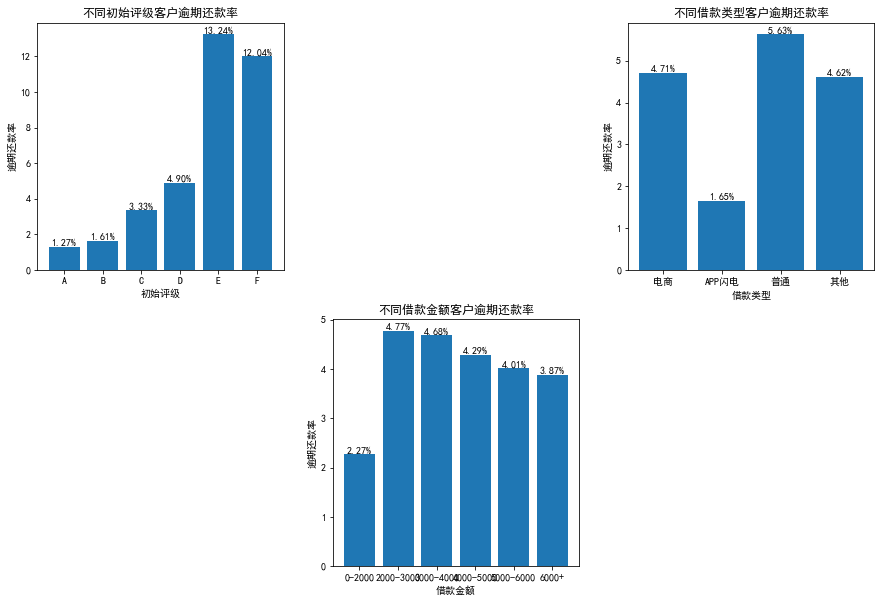

In [37]:
#初始评级的数据划分
level_idx = ('A','B','C','D','E','F')
lev = []
for i in level_idx:
    temp = LC[LC['初始评级'] == i]
    lev.append(temp)
    
#借款类型的数据划分
kind_idx = ('电商', 'APP闪电','普通', '其他')
kind = []
for i in kind_idx:
    temp = LC[LC['借款类型'] == i]
    kind.append(temp)
 
#不同借款金额的数据划分  
amount_idx = ('0-2000', '2000-3000', '3000-4000', '4000-5000', '5000-6000', '6000+')
amountA = LC.loc[(LC['借款金额'] > 0) & (LC['借款金额'] < 2000)]
amountB = LC.loc[(LC['借款金额'] >= 2000) & (LC['借款金额'] < 3000)]
amountC = LC.loc[(LC['借款金额'] >= 3000) & (LC['借款金额'] < 4000)]
amountD = LC.loc[(LC['借款金额'] >= 4000) & (LC['借款金额'] < 5000)]
amountE = LC.loc[(LC['借款金额'] >= 5000) & (LC['借款金额'] < 6000)]
amountF = LC.loc[(LC['借款金额'] >= 6000)]
amount = (amountA, amountB, amountC, amountD,amountE,amountF)

LC['逾期还款率'] = LC['历史逾期还款期数']/(LC['历史逾期还款期数']+LC['历史正常还款期数'])*100

#逾期还款率的分析图
def depayplot(i,idx,data,xlabel,title,index):
    depay = []
    for a in data:
        tmp = a[index].mean()
        depay.append(tmp)
    plt.subplot(2,3,i)
    plt.bar(idx, depay)
    for (a, b) in zip(idx, depay):
        plt.text(a, b+0.001, '%.2f%%'% b, ha='center', va='bottom', fontsize=10)
    plt.xlabel(xlabel)
    plt.ylabel(index)
    plt.title(title)

plt.figure(figsize=(15, 10))
index = '逾期还款率'
# 根据初始评级对逾期还款率进行分析
depayplot(1,level_idx,lev,'初始评级','不同初始评级客户逾期还款率',index)

# 根据年龄对逾期还款率进行分析
# depayplot(2,age_idx,age,'年龄','不同年龄客户逾期还款率',index)

# 根据借款类型对逾期还款率进行分析
depayplot(3,kind_idx,kind,'借款类型','不同借款类型客户逾期还款率',index)

# 根据性别对逾期还款率进行分析
# depayplot(4,sex_idx,sex,'性别','不同性别客户逾期还款率',index)

# 根据借款金额对逾期还款率进行分析
depayplot(5,amount_idx,amount,'借款金额','不同借款金额客户逾期还款率',index)

plt.show()

结论：

1.初始评级对于贷款者的还款能力有比较好的预测作用，EF两级反转可能是因为样本数量较少，ABCD四个等级的平均逾期还款率都比较小，而EF两级明显增大，故公司对于这两类贷款者要谨慎对待。

2.年龄对于逾期率的分布较为平均，25-30岁的年轻人可以重点关注。

3.APP闪电的逾期还款率明显低于其他三种，故公司可以多考虑与“APP闪电”借款类型的合作。

4.女性的逾期率高于男性，可能是由于生活中男性收入较女性高造成的。

#### 分析借款利率（借款人的初始评级、借款类型、性别、年龄、借款金额等特征）

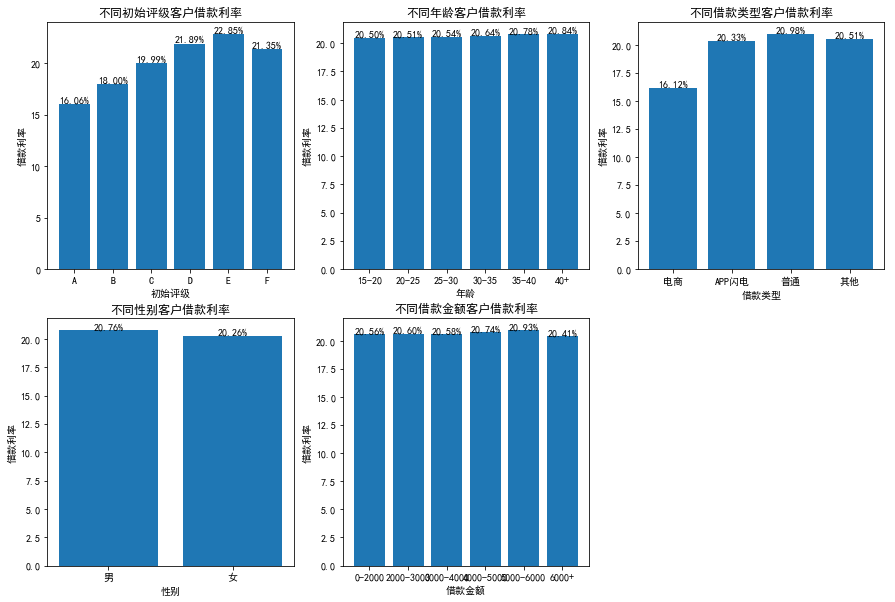

In [38]:
#借款利率的分析图
plt.figure(figsize=(15, 10))
index1 = '借款利率'

# 根据初始评级对借款利率进行分析
depayplot(1,level_idx,lev,'初始评级','不同初始评级客户借款利率',index1)

# 根据年龄对借款利率进行分析
depayplot(2,age_idx,age,'年龄','不同年龄客户借款利率',index1)

# 根据借款类型对借款利率进行分析
depayplot(3,kind_idx,kind,'借款类型','不同借款类型客户借款利率',index1)

# 根据性别对借款利率进行分析
depayplot(4,sex_idx,sex,'性别','不同性别客户借款利率',index1)

# 根据借款金额对借款利率进行分析
depayplot(5,amount_idx,amount,'借款金额','不同借款金额客户借款利率',index1)

plt.show()

结论：

1.年龄对于借款利率的分布较为平均，差异性很小。

2.初始评级的平均借款利率由小到大排列为ABCDFDE。

3.电商的借款利率明显低于其他三种。

4.女性所能接受的借款利率低于男性。

5.借款金额对于借款利率的分布较为平均，差异性很小。

### LCLP数据集分析用户的还款情况

基于LCLP 数据，分析用户的还款习惯（提前一次性全部还款 、部分提前还款以及逾期还款）的金额占比。

将数据集按借款金额分组，并按还款状态和还款日期分成四种还款情况并进行统计：

（1）一次性全部还款：其还款状态标记为‘已提前还清该标全部欠款’；

（2）部分提前还款：其还款状态标记为’已正常还款’，并且当期的还款日期早于到期日期；

（3）正常还款：其还款状态标记为’已正常还款’，并且当期的还款日期即为到期日期；

（4）逾期还款：还款状态标记为‘未还款’，‘已逾期还款’或者‘已部分还款’。

用百分堆积柱状图展示在不同年龄段（15 -20 ，20 -25 ，25 -30 ， 30-35 ，35 -40 ，40+ ）,不同性别（ 男、女），不同初始评级（A-F），不同借款类型、不同借款金额（1-1000，1000 -2000，2000-3000，3000+）、不同期数（1-24）的走势。

In [39]:
# 删除尚未到期的记录
LP = LP[LP['到期日期'] <= LP['recorddate']]
#LP.info()
#LP.describe()

# 将LC和LP两个表融合起来
LCLP = pd.merge(LC, LP, how='left', on=['ListingId'])

# 删除数据不全的记录
LCLP = LCLP.dropna(how='any')
LCLP.info()
LCLP.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023959 entries, 0 to 1603587
Data columns (total 31 columns):
ListingId     1023959 non-null int64
借款金额          1023959 non-null int64
借款期限          1023959 non-null int64
借款利率          1023959 non-null float64
借款成功日期        1023959 non-null object
初始评级          1023959 non-null object
借款类型          1023959 non-null object
是否首标          1023959 non-null object
年龄            1023959 non-null int64
性别            1023959 non-null object
手机认证          1023959 non-null object
户口认证          1023959 non-null object
视频认证          1023959 non-null object
学历认证          1023959 non-null object
征信认证          1023959 non-null object
淘宝认证          1023959 non-null object
历史成功借款次数      1023959 non-null int64
历史成功借款金额      1023959 non-null float64
总待还本金         1023959 non-null float64
历史正常还款期数      1023959 non-null int64
历史逾期还款期数      1023959 non-null int64
逾期还款率         1023959 non-null float64
期数            1023959 non-null float64
还款状态          1

,ListingId,借款金额,借款期限,借款利率,年龄,历史成功借款次数,历史成功借款金额,总待还本金,历史正常还款期数,历史逾期还款期数,逾期还款率,期数,还款状态,应还本金,应还利息,剩余本金,剩余利息
count,1.023959e+06,1.023959e+06,1.023959e+06,1.023959e+06,1.023959e+06,1.023959e+06,1.023959e+06,1.023959e+06,1.023959e+06,1.023959e+06,1.023959e+06,1.023959e+06,1.023959e+06,1.023959e+06,1.023959e+06,1.023959e+06,1.023959e+06
mean,1.555568e+07,4.260340e+03,1.018629e+01,2.034064e+01,2.929710e+01,3.014310e+00,1.198434e+04,4.808516e+03,1.274921e+01,5.755729e-01,4.133961e+00,3.716038e+00,1.135856e+00,5.270704e+02,4.955353e+01,1.112097e+01,1.004733e+00
std,7.135938e+06,1.184931e+04,2.833507e+00,1.655421e+00,6.524736e+00,3.049200e+00,4.356321e+04,9.220797e+03,1.560610e+01,1.766335e+00,1.116971e+01,2.601770e+00,4.770325e-01,2.849558e+03,1.138766e+02,1.896729e+02,1.091655e+01
min,1.265410e+05,1.000000e+02,1.000000e+00,6.500000e+00,1.800000e+01,1.000000e+00,1.000000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,7.520000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.002527e+07,2.000000e+03,6.000000e+00,2.000000e+01,2.500000e+01,1.000000e+00,3.670000e+03,1.877720e+03,4.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,1.000000e+00,1.746400e+02,1.754000e+01,0.000000e+00,0.000000e+00
50%,1.511169e+07,3.041000e+03,1.200000e+01,2.000000e+01,2.800000e+01,2.000000e+00,7.000000e+03,3.734560e+03,8.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,1.000000e+00,2.969400e+02,3.600000e+01,0.000000e+00,0.000000e+00
75%,2.111501e+07,4.553000e+03,1.200000e+01,2.200000e+01,3.300000e+01,4.000000e+00,1.253700e+04,6.077980e+03,1.600000e+01,0.000000e+00,0.000000e+00,5.000000e+00,1.000000e+00,4.981700e+02,5.855000e+01,0.000000e+00,0.000000e+00
max,3.222780e+07,5.000000e+05,2.400000e+01,2.400000e+01,5.600000e+01,6.490000e+02,7.405926e+06,1.172653e+06,2.507000e+03,6.000000e+01,1.000000e+02,2.300000e+01,4.000000e+00,5.000000e+05,1.750000e+04,6.531642e+04,3.199990e+03


In [42]:
#定义用户还款习惯分析可视化函数
def repayhabit(group,num,idx,xlabel,color):
    # 一次性全部还款
    onetime = []
    for a in group:
        ot = a.loc[a['还款状态'] == 3]['应还本金'].sum() + \
        a.loc[a['还款状态'] == 3]['应还利息'].sum()
        onetime.append(ot)
    # 部分提前还款
    partial = []
    for a in group:
        pa = a.loc[(a['还款状态'] == 1) & (a['还款日期'] < a['到期日期'])]['应还本金'].sum() + \
        a.loc[(a['还款状态'] == 1) & (a['还款日期'] < a['到期日期'])]['应还利息'].sum()
        partial.append(pa)
    # 逾期还款
    pastdue = []
    for a in group:
        pas = a.loc[(a['还款状态'] == 2) | (a['还款状态'] == 4)|(a['还款状态'] == 0)]['应还本金'].sum() + \
            a.loc[(a['还款状态'] == 2) | (a['还款状态'] == 4)|(a['还款状态'] == 0)]['应还利息'].sum()
        pastdue.append(pas)
    # 正常还款
    normal = []
    for a in group:
        nm = a.loc[(a['还款状态'] == 1) & (a['还款日期'] == a['到期日期'])]['应还本金'].sum() + \
        a.loc[(a['还款状态'] == 1) & (a['还款日期'] == a['到期日期'])]['应还利息'].sum()
        normal.append(nm)
    
    tot = []
    for i in range(num):
        t = onetime[i]+partial[i]+pastdue[i]+normal[i]
        tot.append(t)

    print(tot)

    temp = []
    for i in range(num):
        tp = (100 * onetime[i] / tot[i], 100 * partial[i] / tot[i],
                100 * normal[i] / tot[i], 100 * pastdue[i] / tot[i])
        temp.append(tp)
        
    df = pd.DataFrame(temp)
    df.index = idx
    df.columns = ('提前一次性', '部分提前', '正常', '逾期')
    print(df)

    df.plot(kind='bar', colormap=color, stacked=True)
    plt.ylabel('还款金额')
    plt.xlabel(xlabel)
    plt.legend(loc='best')
    plt.show()

[28456834.85, 69903191.44000001, 99595369.9, 72161874.03, 51083566.29000001, 269236628.2506]
               提前一次性       部分提前         正常         逾期
0-2000     10.204426  60.954742  16.233811  12.607020
2000-3000  10.208217  54.959603  20.400835  14.431346
3000-4000  14.874141  50.961604  21.902815  12.261440
4000-5000  14.678874  50.698304  22.775784  11.847038
5000-6000  15.703463  50.299053  23.239861  10.757622
6000+      11.688029  39.376116  39.790049   9.145806


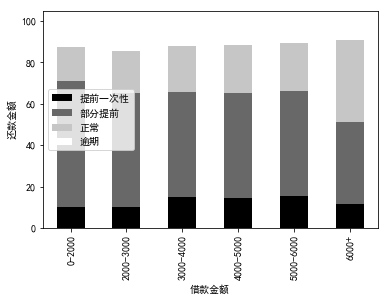

In [43]:
# 分析不同借款金额用户的还款情况
amountA = LCLP.loc[(LCLP['借款金额'] > 0) & (LCLP['借款金额'] < 2000)]
amountB = LCLP.loc[(LCLP['借款金额'] >= 2000) & (LCLP['借款金额'] < 3000)]
amountC = LCLP.loc[(LCLP['借款金额'] >= 3000) & (LCLP['借款金额'] < 4000)]
amountD = LCLP.loc[(LCLP['借款金额'] >= 4000) & (LCLP['借款金额'] < 5000)]
amountE = LCLP.loc[(LCLP['借款金额'] >= 5000) & (LCLP['借款金额'] < 6000)]
amountF = LCLP.loc[(LCLP['借款金额'] >= 6000)]
amountgroup = [amountA, amountB, amountC, amountD,amountE,amountF]

repayhabit(amountgroup,6,amount_idx,'借款金额','Greys_r')

在根据借款金额分组中，得到结果如下：

A组（0-2000）：总金额2.85千万。（1）一次性全部还款：占比 10.20%；（2）部分提前还款：占比60.95%；（3）正常还款：占比 16.23%； （4）逾期还款：占比 12.61%。

B组（2000-3000）：总金额 7千万。（1）一次性全部还款：占比 10.21%；（2）部分提前还款：占比54.96%；（3）正常还款：占比 20.40%； （4）逾期还款：占比 14.43%。

C组（3000-4000）：总金额 10千万。（1）一次性全部还款：占比 14.87%；（2）部分提前还款：占比50.96%；（3）正常还款：占比 21.90%； （4）逾期还款：占比 12.26%。

D组（4000-5000）：总金额 7.22千万。（1）一次性全部还：占比 14.68%；（2）部分提前还款：占比50.70%；（3）正常还款：占比 22.78%； （4）逾期还款：占比 11.85%。

E组（5000-6000）：总金额 5.11千万。（1）一次性全部还款：占比 15.70%；（2）部分提前还款：占比50.30%；（3）正常还款：占比 23.24%； （4）逾期还款：占比 10.76%。

F组（6000+）：总金额 26.92千万。（1）一次性全部还款：占比 11.69%；（2）部分提前还款：占比39.38%；（3）正常还款：占比 39.79%； （4）逾期还款：占比 9.15%。

从对借款金额分组的统计结果以及上图结果中可以看出：

（1）借款总额6000元以上最多，3000-4000其次，说明3000-4000元的借款金额是最多的。

（2）逾期风险在各金额组表现比较平均，其中2000-3000最大，6000+最小。

（3）随着标的金额增加，部分提前还款的总金额比例在减少，正常还款的总金额比例在增加。

[1325708.5400000003, 85978811.91999999, 203407279.9106, 149443150.8962, 79947743.0043, 70334770.4895]
           提前一次性       部分提前         正常         逾期
15-20  10.441107  62.896452  13.114767  13.547674
20-25  13.428313  53.199581  20.048697  13.323409
25-30  14.002901  47.665900  26.687108  11.644091
30-35  12.363756  43.932650  33.824134   9.879460
35-40  10.805522  44.388718  34.672769  10.132990
40+    10.882495  42.854777  37.205296   9.057432


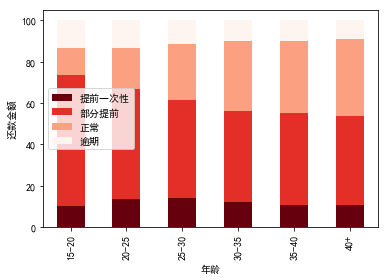

In [44]:
# 分析不同年龄段用户的还款情况
ageA = LCLP.loc[(LCLP['年龄'] >= 15) & (LCLP['年龄'] < 20)]
ageB = LCLP.loc[(LCLP['年龄'] >= 20) & (LCLP['年龄'] < 25)]
ageC = LCLP.loc[(LCLP['年龄'] >= 25) & (LCLP['年龄'] < 30)]
ageD = LCLP.loc[(LCLP['年龄'] >= 30) & (LCLP['年龄'] < 35)]
ageE = LCLP.loc[(LCLP['年龄'] >= 35) & (LCLP['年龄'] < 40)]
ageF = LCLP.loc[LCLP['年龄'] >= 40]
agegroup = [ageA, ageB, ageC, ageD, ageE, ageF]

repayhabit(agegroup,6,age_idx,'年龄','Reds_r')

在年龄分组中，得到结果如下：

A组（15-20岁）：总金额0.13千万。（1）一次性全部还款：占比 10.44%；（2）部分提前还款：占比62.90%；（3）正常还款：占比 13.11%； （4）逾期还款：占比 13.55%。

B组（20-25岁）：总金额 8.60千万。（1）一次性全部还款：占比 13.43%；（2）部分提前还款：占比53.2%；（3）正常还款：占比 20.05%； （4）逾期还款：占比 13.32%。

C组（25-30岁）：总金额 20.34千万。（1）一次性全部还款：占比 14.00%；（2）部分提前还款：占比47.67%；（3）正常还款：占比 26.69%； （4）逾期还款：占比 11.64%。

D组（30-35岁）：总金额 14.94千万。（1）一次性全部还款：占比 12.36%；（2）部分提前还款：占比43.92%；（3）正常还款：占比 33.82%； （4）逾期还款：占比 9.88%。

E组（35-40岁）：总金额 8.00千万。（1）一次性全部还款：占比 10.81%；（2）部分提前还款：占比44.39%；（3）正常还款：占比 34.67%； （4）逾期还款：占比 10.13%。

F组（40岁+）：总金额 7.03千万。（1）一次性全部还款：占比 10.88%；（2）部分提前还款：占比42.85%；（3）正常还款：占比 37.21%； （4）逾期还款：占比 9.06%。

从对年龄分组的统计结果以及上图结果中可以看出：

（1）拍拍贷的客户群体中25-30岁年龄组的贷款金额最高，15-20岁最低；

（2）各年龄组的还款习惯大体一致，从金额上来说，部分提前还款和正常还款是最常用的方式；

（3）逾期还款风险最高的年龄组为15-20岁组；

（4）25-30岁年龄组一次性提前还款的金额占比最高。

[431899402.1953, 158538062.5653]
       提前一次性       部分提前         正常         逾期
男  13.159444  45.775236  30.093425  10.971895
女  11.417458  48.638828  29.114713  10.829001


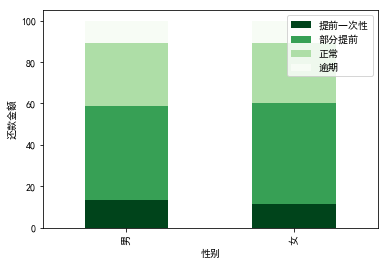

In [45]:
# 分析不同性别用户的还款情况
male = LCLP.loc[LCLP['性别'] == "男"]
female = LCLP.loc[LCLP['性别'] == "女"]
sexgroup = (male,female)

repayhabit(sexgroup,2,sex_idx,'性别','Greens_r')

在男女性别组中，得到结果如下：

男性：总还款金额 43.19千万。（1）一次性全部还款占比 13.16%；（2）部分提前还款占比45.78%；（3）正常还款占比 30.09%； （4）逾期还款占比10.97%。

女性：总还款金额 15.85千万。（1）一次性全部还款占比 11.42%；（2）部分提前还款占比48.64%；（3）正常还款占比29.11%； （4）逾期还款占比10.83%。

从对男女性别组的统计结果以及上图结果中可以看出：

（1）拍拍贷男性客户的贷款金额约为女性客户的2.7倍；

（2）男性及女性的还款习惯大体上比较一致，从金额上来说，部分提前还款>正常还款>一次性提前还款>逾期还款；

（3）男性客户一次性提前还款的金额占比较女性为高；

（4）女性逾期还款的风险略低于男性；

（5）女性部分提前还款的金额占比略大于男性。

[24260113.047399998, 129789781.91, 292672443.2151, 131419854.39039999, 10771732.247699998, 1523539.95]
       提前一次性       部分提前         正常         逾期
A  10.951641  42.540019  39.727788   6.780552
B   7.686131  37.447042  47.651688   7.215139
C  14.192953  49.919494  24.995052  10.892502
D  14.592841  49.269359  21.846049  14.291750
E  13.213394  40.965391  22.906776  22.914440
F  10.752586  41.241621  20.679682  27.326111


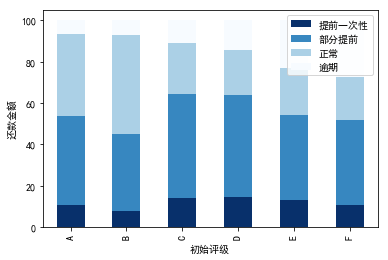

In [46]:
# 分析不同初始评级客户的还款情况
levelgroup = []
for i in level_idx:
    l = LCLP[(LCLP['初始评级'] == i)]
    levelgroup.append(l)
    
repayhabit(levelgroup,6,level_idx,'初始评级','Blues_r')

在初始评级分组中，得到结果如下：

A级：总金额2.43千万。（1）一次性全部还款：占比 10.95%；（2）部分提前还款：占比42.54%；（3）正常还款：占比 39.73%； （4）逾期还款：占比 6.78%。

B级：总金额 12.98千万。（1）一次性全部还款：占比 7.68%；（2）部分提前还款：占比37.45%；（3）正常还款：占比 47.65%； （4）逾期还款：占比 7.22%。

C级：总金额 29.27千万。（1）一次性全部还款：占比 14.19%；（2）部分提前还款：占比49.92%；（3）正常还款：占比 25.00%； （4）逾期还款：占比 10.89%。

D级：总金额 13.14千万。（1）一次性全部还款：占比 14.59%；（2）部分提前还款：占比49.27%；（3）正常还款：占比 21.85%； （4）逾期还款：占比 14.29%。

E级：总金额 1.08千万。（1）一次性全部还款：占比 13.21%；（2）部分提前还款：占比40.97%；（3）正常还款：占比 22.91%； （4）逾期还款：占比 22.91%。

F级：总金额 0.15千万。（1）一次性全部还款：占比 10.75%；（2）部分提前还款：占比41.24%；（3）正常还款：占比 20.68%； （4）逾期还款：占比 27.33%。

从对初始评级分组的统计结果可以看出：

（1）B级客户借款总额最多，占到了大约50%的金额。B、C、D级客户是借款的主力军。

（2）提前一次性还款的占比相对比较平均，其中D级最大为14.59%。

（3）逾期风险随着级别而呈总体增加趋势，F级客户的逾期占比达到了27.33%。

（4）部分提前和正常还款还是占到了大多数。

（5）总的来说，初始评级具有重要的参考意义。

[85700890.47, 74452365.96, 234675993.36, 195608214.9706]
           提前一次性       部分提前         正常         逾期
电商      4.218635  26.927505  62.071671   6.782188
APP闪电   8.959958  61.125398  18.677700  11.236944
普通     17.162002  45.092948  26.095824  11.649226
其他     12.461221  51.329790  24.430785  11.778204


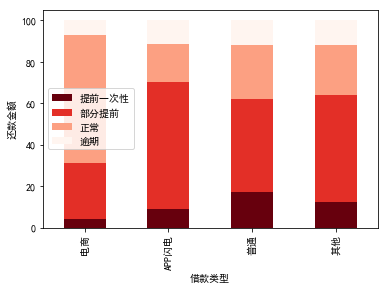

In [47]:
# 分析不同借款类型客户的还款情况
kindgroup = []
for i in kind_idx:
    l = LCLP[(LCLP['借款类型'] == i)]
    kindgroup.append(l)
    
repayhabit(kindgroup,4,kind_idx,'借款类型','Reds_r')

在借款类型分组中，得到结果如下：

电商：总金额8.57千万。（1）一次性全部还款：占比 4.22%；（2）部分提前还款：占比26.93%；（3）正常还款：占比 62.07%； （4）逾期还款：占比 6.78%。

APP闪电：总金额 7.45千万。（1）一次性全部还款：占比 8.96%；（2）部分提前还款：占比61.13%；（3）正常还款：占比 18.68%； （4）逾期还款：占比11.24%。

普通：总金额 23.47千万。（1）一次性全部还款：占比 17.16%；（2）部分提前还款：占比45.09%；（3）正常还款：占比 26.10%； （4）逾期还款：占比 11.65%。

其他：总金额 19.56千万。（1）一次性全部还款：占比 12.46%；（2）部分提前还款：占比51.33%；（3）正常还款：占比 24.43%； （4）逾期还款：占比 11.78%。

从对借款类型分组的统计结果可以看出：

（1）普通借款类型的借款金额总数最大，其次是其他，电商和APP闪电差不多。

（2）逾期风险电商最低，为6.78%。其他三种类型差不多。

（3）部分提前和正常还款还是占到了大多数。值得注意的是除了电商，其他三种类型的部分提前还款都占比很大。

[135981578.1922, 108408463.47999999, 93715601.03, 75294688.9507, 60648276.0339, 47917912.09030001, 19092666.1202, 15699880.5325, 12331986.870000001, 9339947.0008, 6687098.62, 4416541.7700000005, 301461.70999999996, 169327.15999999997, 143667.96000000002, 83483.42, 69138.15, 50308.28, 36507.18, 19895.030000000002, 17235.37, 7340.29, 4459.52, 0.0]
        提前一次性       部分提前         正常         逾期
1   11.445900  47.586534  33.902811   7.064756
2   12.167250  50.653062  28.728319   8.451370
3   15.843928  46.505031  28.396910   9.254131
4   14.029461  44.266042  30.340452  11.364045
5   12.805724  44.175306  30.414081  12.604889
6    9.611442  44.158815  31.276022  14.953720
7   15.717427  44.974685  22.785384  16.522504
8   14.343482  44.269646  23.244959  18.141913
9   11.168077  44.718088  23.378983  20.734852
10  10.209341  44.175032  23.368664  22.246963
11   7.335732  43.147448  24.866896  24.649924
12   3.498742  46.299654  23.112021  27.089583
13  40.902773  19.437918  24.870807  14.7

D:\Anaconda\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
D:\Anaconda\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in double_scalars


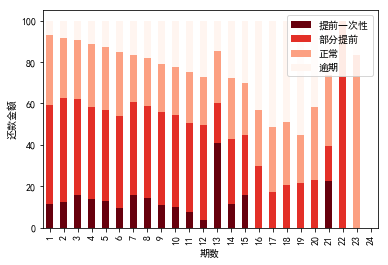

In [48]:
# 分析不同借款期数客户的还款情况
term_idx = ('1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24')
termgroup = []
for i in range(1,25):
    term = LCLP.loc[(LCLP['期数'] == i)]
    termgroup.append(term)

repayhabit(termgroup,24,term_idx,'期数','Reds_r')

从对期数分组的统计结果可以看出：

（1）借款金额是随着期数增加呈现出下降的趋势。

（2）不同的还款行为在不同的借款期限下的表现差异比较大，部分提前还款和正常还款是最常用的方式；

（3）逾期风险随着借款期限变长而呈总体增加趋势，期限为20个月的逾期金额占比为最高，达到了57.30%；

（4）期限为13个月的提前一次性还款占比最高，达到了16.77%。

（5）借款期限太长的样本数量太少，不能排除偶然性。

### 计算金额催收回款率（催收回本金/所有逾期本金）

在不同等级（A-F）、不同借款期数（1-24）和不同借款金额（0-2000，2000-3000，3000-4000，4000-5000，5000-6000，6000+）等，随逾期天数增加而呈现的走势。

1）x轴为逾期天数，y轴为金额催收回款率，不同参数对应不同曲线；

2）催收回款的定义为逾期90天之内的逾期还款。

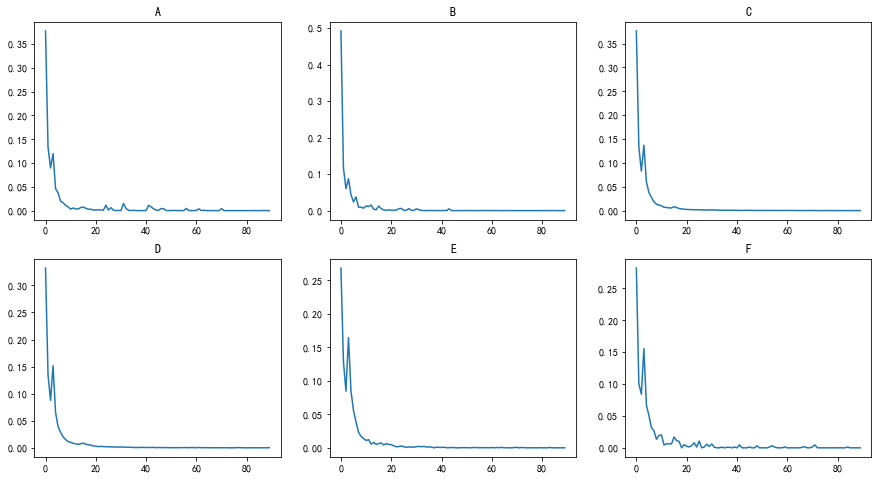

In [49]:
from datetime import datetime,timedelta

#LCLP.info()
LCLP['recorddate'] = pd.to_datetime(LCLP['recorddate'])
LCLP['到期日期'] = pd.to_datetime(LCLP['到期日期'])
LCLP['还款日期'] = pd.to_datetime(LCLP['还款日期'], errors='coerce')
LCLP['lateday'] = LCLP['还款日期']-LCLP['到期日期']

depay = LCLP[LCLP['lateday']>timedelta(days=0)]

#不同等级（A-F）随逾期天数催收还款率的走势
df = depay.groupby(['初始评级','lateday'])['应还本金'].sum()
df1 = df.to_frame().pivot_table(index='lateday',columns = '初始评级', values ='应还本金')
tmp = df1.fillna(0)
df2 = depay.groupby(['初始评级'])['应还本金'].sum()
tmp_1 = tmp[tmp.index <= timedelta(days=90)]
tmp_1 = tmp_1/df2

plt.figure(figsize=(15, 8))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.plot(range(90),tmp_1[level_idx[i]])
    plt.title(level_idx[i])
plt.show()

不同等级（A-F）随逾期天数催收还款率的走势大致相同，也就是大部分人都在逾期十天之内还款，说明他们有可能忘记还款；特别是在4、5天的还款的人数和金额最多。

KeyError: 22.0

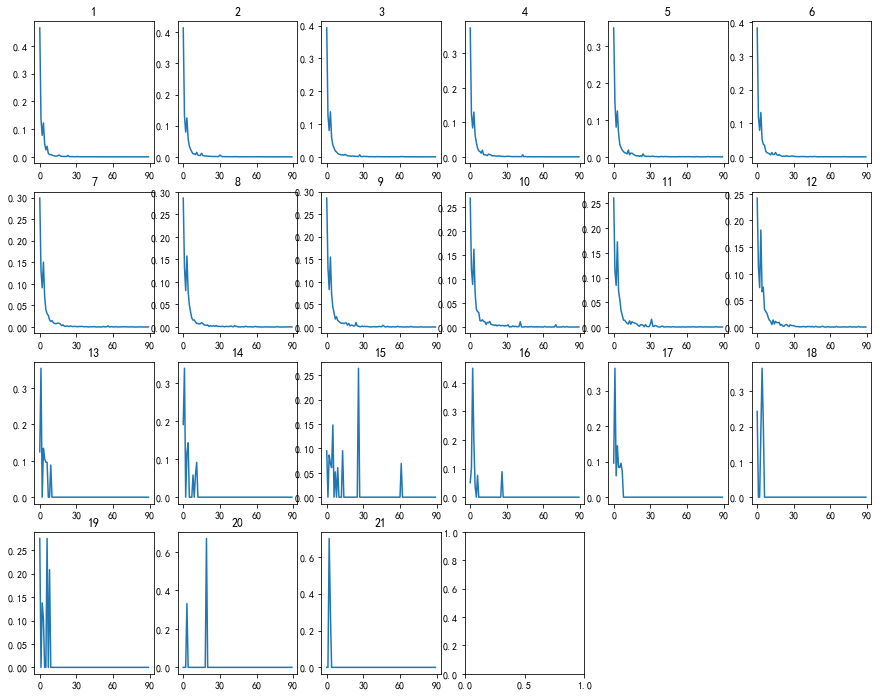

In [50]:
#不同借款期数（1-24）随逾期天数催收还款率的走势
#由于期数为24的项目不存在逾期还款的现象，所以只对1-23进行分析

df = depay.groupby(['期数','lateday'])['应还本金'].sum()
df1 = df.to_frame().pivot_table(index='lateday',columns = '期数', values ='应还本金')
tmp = df1.fillna(0)
df2 = depay.groupby(['期数'])['应还本金'].sum()
tmp_1 = tmp[tmp.index <= timedelta(days=90)]
tmp_1 = tmp_1/df2

plt.figure(figsize=(15, 12))
for i in range(1,24):
    plt.subplot(4,6,i)
    plt.plot(range(90),tmp_1[i])
    plt.xticks([0,30,60,90])
    plt.title(str(i))
plt.show()

不同借款期数（1-24）的金额收回款率随逾期天数的趋势没有明显的规律。在12期及之前大部分人都在逾期十天之内还款，特别是在4、5天的还款的人数和金额最多。 但是13之后呈现出10天之后回款率的依然很大。也有可能是因为数据量导致异常值凸显，但是也说明了借款期数长的回款率不够稳定。

D:\Anaconda\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


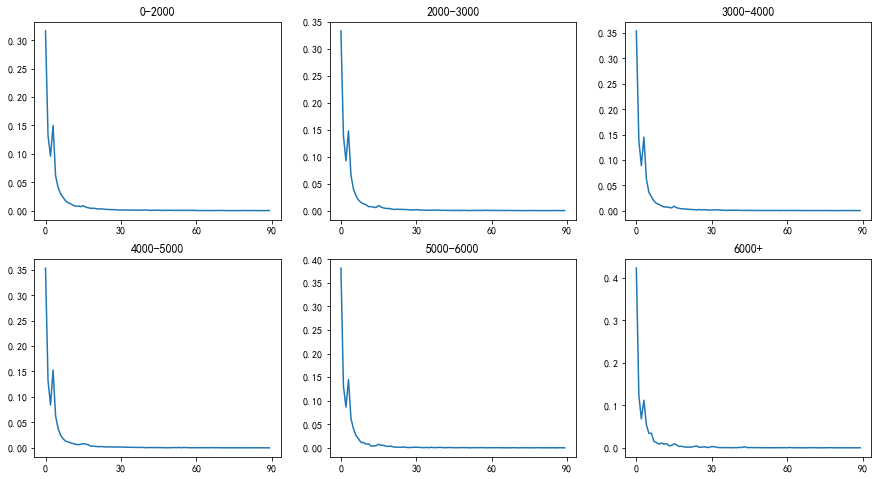

In [51]:
#不同借款金额随逾期天数催收还款率的走势
def function(a):
    if a>0 and a<2000:
        return '0-2000'
    elif a>=2000 and a<3000:
        return '2000-3000'
    elif a>=3000 and a<4000:
        return '3000-4000'
    elif a>=4000 and a<5000:
        return '4000-5000'
    elif a>=5000 and a<6000:
        return '5000-6000'
    else:
        return '6000+'

depay['金额类型'] = depay.apply(lambda x:function(x['借款金额']),axis=1)

df = depay.groupby(['金额类型','lateday'])['应还本金'].sum().copy()
df1 = df.to_frame().pivot_table(index='lateday',columns = '金额类型', values ='应还本金')
tmp = df1.fillna(0)
df2 = depay.groupby(['金额类型'])['应还本金'].sum()
tmp_1 = tmp[tmp.index <= timedelta(days=90)]
tmp_1 = tmp_1/df2

plt.figure(figsize=(15, 8))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.plot(range(90),tmp_1[amount_idx[i]])
    plt.xticks([0,30,60,90])
    plt.title(amount_idx[i])
plt.show()

对不同借款金额对于进入催收回款率影响较大，借款金额越多，逾期的可能性就越大。

### 累积收益曲线

LCIS数据提供了该客户投资的从2015年1月1日起成交的所有标。包括投标记录和还款状况。请计算并画出该投资人从2016年9月开始到2017年2月，每月月底的累计收益曲线。

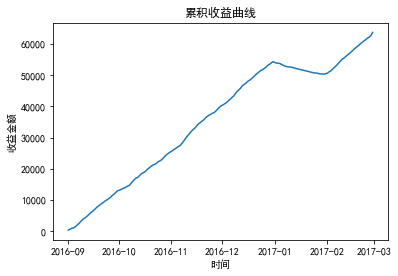

In [53]:
from datetime import datetime,timedelta
LCIS = pd.read_csv("ppdai2017/LCIS.csv",encoding = 'utf-8')

# 计算从2016年9月至2017年2月所有的利息
def getinterest(df):
    df_1 = df[['ListingId','标当前状态','上次还款日期','上次还款利息']]
    df_1 = df_1[(df_1['标当前状态'] =='正常还款中') | (df_1['标当前状态'] =='已还清')]
    df_1['上次还款日期'] = df_1['上次还款日期'].where(df_1['上次还款日期'].notnull(),'2016/08/31')
    df_1['上次还款日期'] = pd.to_datetime(df_1['上次还款日期'], errors='coerce')
    df_1 = df_1[df_1['上次还款日期']>='2016-09-01'].drop_duplicates()
    df_1_1 = df_1.groupby(['上次还款日期'])['上次还款利息'].sum().to_frame().reset_index()
    return df_1_1

# 计算从2016年9月至2017年2月所有的亏损
def getloss(df):    
    df_2 = df[['ListingId', '待还本金', '标当前状态', '上次还款日期', '下次计划还款日期', 'recorddate']]
    df_2 = df_2[(df_2['标当前状态']=='逾期中')]
    df_2['下次计划还款日期'] = pd.to_datetime(df_2['下次计划还款日期'], errors='coerce')
    df_2['recorddate'] = pd.to_datetime(df_2['recorddate'], errors='coerce')
    
    # 往回看90天到2016-06-03
    df_2 = df_2[df_2['下次计划还款日期']>='2016-06-03']
    df_2['delay'] = df_2.apply(lambda x: (x['recorddate'] - x['下次计划还款日期']).days, axis = 1)
    df_2_1 = df_2[df_2['delay']>=90].sort_values(['ListingId','delay'])
    df_2_1['date'] = df_2['下次计划还款日期'] + timedelta(days=90)
    df_2_2 = df_2_1.loc[df_2_1.sort_values('recorddate').iloc[:,0].drop_duplicates().index]
    df_2_2 = df_2_2[['date','待还本金']].groupby(['date'])['待还本金'].sum().to_frame().reset_index()
    return df_2_2

# merge gain and loss
def profit(df):
    df_1_1 = getinterest(df)
    df_2_2 = getloss(df)
    df_now = pd.merge(df_1_1,df_2_2, how = 'left', left_on = '上次还款日期', right_on = 'date')    
    df_now['待还本金'] = df_now['待还本金'].where(df_now['待还本金'].notnull(),0)
    df_now['差别'] = df_now['上次还款利息'] - df_now['待还本金']
    return df_now

def draw(df):
    df_now = profit(df)
    plt.plot(df_now['上次还款日期'], np.cumsum(df_now['差别']), label="利息")
    plt.title('累积收益曲线')
    plt.xlabel('时间')
    plt.ylabel('收益金额')
    plt.show()

draw(LCIS)